# Time Series forecasting using Auto ARIMA in python

* Ref: [https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd](https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd)
* Data: [https://github.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/blob/master/Champagne%20Sales.csv](https://github.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/blob/master/Champagne%20Sales.csv)

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 2.1MB 14.1MB/s 
     |████████████████████████████████| 8.7MB 25.4MB/s 
     |████████████████████████████████| 808kB 40.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from pmdarima.arima import auto_arima

## 1. Load data

In [ ]:
url = 'https://raw.githubusercontent.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/master/Champagne%20Sales.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col=['Month'])

In [ ]:
df.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Champagne sales  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


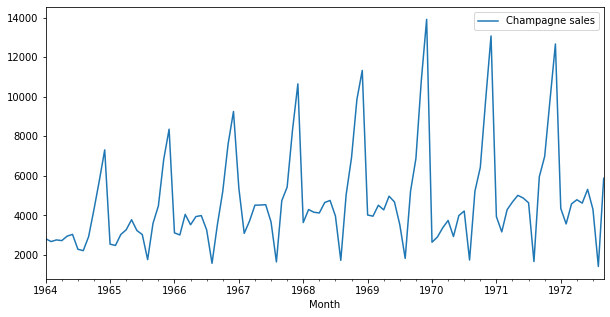

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(ax=ax)
plt.show()

## 2. Analysis

* Test stationary using Augmented Dickey-Fuller Test of pmdarima package

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df)

(0.01, False)

* $p$-values = 0.01 < 0.05
* No differencing is required

## 3. Forecast

* Train test split

In [ ]:
df_train = df[: -20]
df_test = df[-20:]

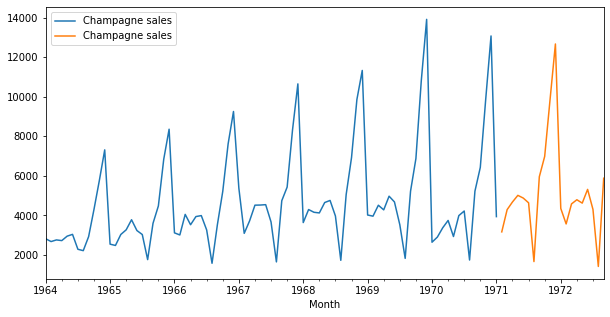

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train.plot(ax=ax, label='Train')
df_test.plot(ax=ax, label='Test')
plt.show()

In [ ]:
model = auto_arima(df_train,
                   start_p=0, max_p=5,
                   d=1, max_d=5,
                   start_q=0, max_q=5,
                   start_P=0, max_P=5,
                   D=1, max_D=5,
                   start_Q=0, max_Q=5,
                   m=12,
                   seasonal=True,
                   error_action='warn',
                   trace=True,
                   suppress_warnings=True,
                   stepwise=True,
                   random_state=20,
                   n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.53 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.41 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.93 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.23 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.06 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.57 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.634, Time=2.13 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.52 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Fri, 02 Oct 2020   AIC                           1174.564
Time:                                     18:53:34   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (Q):                       49.92   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.14   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df_pred = pd.DataFrame(model.predict(n_periods=20),
                       index=df_test.index)
df_pred.columns = ['Predicted Sales']
df_pred.head()

,Predicted Sales
Month,
1971-02-01,2746.720939
1971-03-01,3247.921333
1971-04-01,3592.518261
1971-05-01,2800.886063
1971-06-01,3841.912530


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test['Champagne sales'], df_pred['Predicted Sales'])
r2

0.8114790520163465

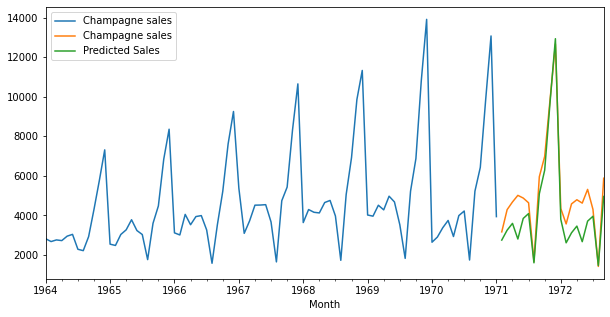

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train.plot(ax=ax, label='Train')
df_test.plot(ax=ax, label='Test')
df_pred.plot(ax=ax, label='Prediction')
plt.legend()
plt.show()